# Assignment 2b Due: 9/14

Please submit this assignment as Assignment2b_FirstName_LastName

In this assignment you will explore fitting data and assessing how well your fit describes the different data sets.

Assignment Overview:
* Fit data and use $\chi^2$ and the $\chi^2$ test to assess 
* Analyze the efficiency of your data provided differnt threshold levels using your fit results 

For this assingment you can make use of the numpy, matplotlib, and the scipy packages.

In [1]:
#specify imports here
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
from scipy import integrate
%matplotlib notebook

# Problem 1: W Boson Mass

Finding the *true* values of a quantity relies on analyzing results for many experiments. One quantity that has been measured many times is the W boson mass see Wikipedia https://en.wikipedia.org/wiki/W_and_Z_bosons and the particle data group (PDG) https://pdg.lbl.gov/2018/listings/rpp2018-list-w-boson.pdf 

**a)** In this problem you will analyze measurements of the W boson from various experiments and determine if the values are consistnet and given this data set, what the best fit value is. Start by reading in the data file Wmass_data.txt, which contains an experiment number, W mass in units of $GeV/c^2$ and its uncertainty.


In [2]:
N,W_mass,W_mass_error = np.loadtxt('data/Wmass_data.txt', unpack = True)

**b)** Compute the error weighted mean of the W mass and its uncertainty. How does the weighted mean compare to the bold faced average of the PDG?

In [136]:
ewm_W_mass = np.sum(W_mass*W_mass_error)/np.sum(W_mass_error)
ewm_W_mass_error = np.sum(W_mass_error*W_mass_error)/np.sum(W_mass_error)
print("Error Weighted Mean of W mass:","\n",ewm_W_mass, "+/-",ewm_W_mass_error)

ewm_PDG = [80.379,0.012]
percent_error_W_mass = 100*(ewm_W_mass-ewm_PDG[0])/ewm_PDG[0]
percent_error_W_mass_error = 100*(ewm_W_mass_error-ewm_PDG[1])/ewm_PDG[1]
print("\n(Comparison) Percent error of bold faced average vs. EWM W Mass:\n",percent_error_W_mass,
      '%',"+/-",percent_error_W_mass_error,"%") 

Error Weighted Mean of W mass: 
 80.39910491071429 +/- 0.06100446428571429

(Comparison) Percent error of bold faced average vs. EWM W Mass:
 0.025012641006084645 % +/- 408.3705357142857 %


**c)** Calculate the $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value. The p-value can be calculated using *gammaincc(dof / 2.0, chisq / 2.0)* from *scipy.special*. Based on the p-value are the data consistant?

In [140]:
chisq1 = np.sum(((ewm_PDG[0]-ewm_W_mass)**2/W_mass_error**2))
dof1 = len(N)-1-1
chisq1_reduced = chisq1/dof1
chisq1_pvalue = sf.gammaincc(dof1/2.0, chisq1/2.0)
print("Chi^2 =",chisq1,"\nD.o.F =",dof1,"\nChi^2 Reduced =",
      chisq1_reduced,"\nP-Value =",chisq1_pvalue)

print('\nBased on the p-value the data is fairly consistent.')

Chi^2 = 3.781947213589754 
D.o.F = 7 
Chi^2 Reduced = 0.5402781733699649 
P-Value = 0.804522404043395

Based on the p-value the data is fairly consistent.


**d)** Plot the measurement number vs. the W mass. Don't forget to include the error bars on the W mass measurements. Then Fit a line of the form $y = p_0$, where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

<IPython.core.display.Javascript object>


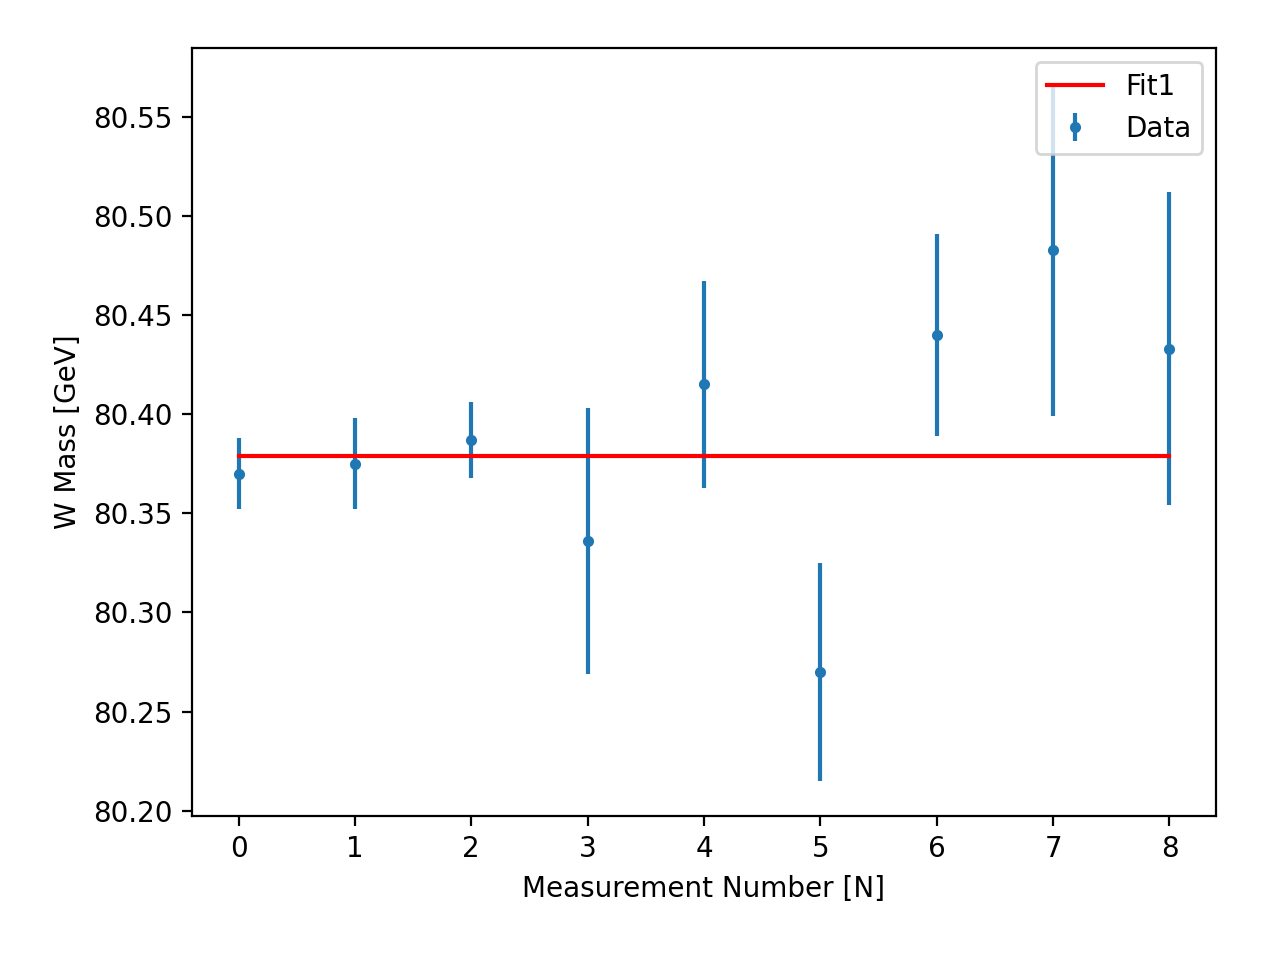

(Comparison) Percent error of p0 vs. EWM W Mass: [-0.02482463] %


In [142]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.15,0.8,0.8])
axes.set_xlabel('Measurement Number [N]')
axes.set_ylabel('W Mass [GeV]')

def func1(N,p0):
    return p0
Wopt, Werr = curve_fit(func1, N,W_mass,sigma = W_mass_error, absolute_sigma = True)
axes.errorbar(N,W_mass,yerr = W_mass_error,fmt = '.', label = 'Data')
axes.plot(N,func1(N,np.ones(9)*Wopt),'r-', label = 'Fit1')
axes.legend()


print("(Comparison) Percent error of p0 vs. EWM W Mass:",100*(Wopt-ewm_W_mass)/ewm_W_mass,'%')

# Problem 2: Proton Charge Radius

We will carry an identical analysis as we did in Problem 1, but on a different quantity, the proton charge radius. The proton charge radius has been a recent hot topic in the nuclear physics field, as new designed experiments using muonic hydorgen have made very percise measurements of it. See https://www.nature.com/articles/s41586-019-1721-2

**a)** Import the data set proton_radius_data.txt, which includes the experiment number, the proton charge radius, and its uncertainty measured in $fm$. 

In [6]:
N2,ProtonCR,ProtonCR_error = np.loadtxt('data/proton_radius_data.txt', unpack = True)

**b)** Compute the error weighted mean of the proton charge radius and its uncertainty. 

You can also compare this to the PDG value (pgs. 6 and 7): https://pdg.lbl.gov/2018/listings/rpp2018-list-p.pdf 

In [143]:
ewm_ProtonCR = np.sum(ProtonCR*ProtonCR_error)/np.sum(ProtonCR_error)
ewm_ProtonCR_error = np.sum(ProtonCR_error*ProtonCR_error)/np.sum(ProtonCR_error)
print("Error Weighted Mean of Proton charge radius:","\n",ewm_ProtonCR, "+/-",ewm_ProtonCR_error)

ewm_PDG2 = [0.8751,0.0061]
percent_error_ProtonCR = 100*(ewm_ProtonCR-ewm_PDG2[0])/ewm_PDG2[0]
percent_error_ProtonCR_error = 100*(ewm_ProtonCR_error-ewm_PDG2[1])/ewm_PDG2[1]
print("\n(Comparison) Percent error of bold faced average vs. Proton charge radius:\n",percent_error_ProtonCR,
      '%',"+/-",percent_error_ProtonCR_error,"%") 

Error Weighted Mean of Proton charge radius: 
 0.8876640673847367 +/- 0.014374932352554838

(Comparison) Percent error of bold faced average vs. Proton charge radius:
 1.435729332046246 % +/- 135.65462873040718 %


**c)** Calculate the  $\chi^2$, degrees of freedom, reduced $\chi^2$ and p-value. Based on the p-value are the data consistant? Do you see what all of the fuss is about.

In [152]:
chisq2 = np.sum((ewm_PDG2[0]-ewm_ProtonCR)**2)/(np.sum(ProtonCR_error**2))
dof2 = len(N2)-1-1
chisq2_reduced = chisq2/dof2
chisq2_pvalue = sf.gammaincc(dof2/2.0, chisq2/2.0)
print("Chi^2 =",chisq2,"\nD.o.F =",dof2,"\nChi^2 Reduced =",
      chisq2_reduced,"\nP-Value =",chisq2_pvalue)

print('\nBased on the p-value the data is VERY consistent.')

Chi^2 = 0.07212218555524165 
D.o.F = 13 
Chi^2 Reduced = 0.005547860427326281 
P-Value = 0.9999999999997837

Based on the p-value the data is VERY consistent.


**d)** Plot the measurement number vs. the proton charge radius. Don't forget to include the error bars on the proton charge radius measurements. Then Fit a line of the form  $y = p_0$ , where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

<IPython.core.display.Javascript object>


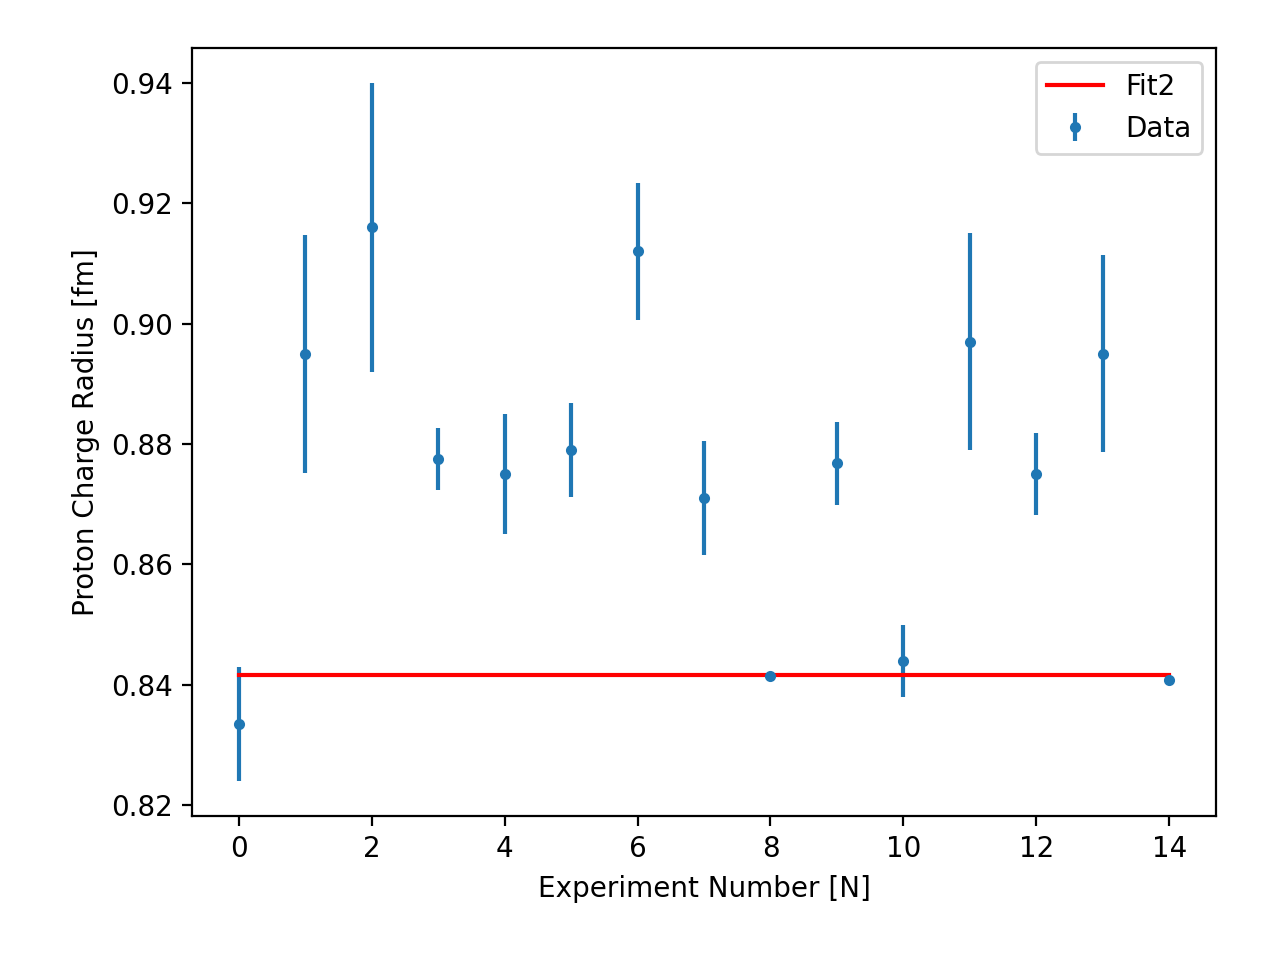


(Comparison) Percent error of P0 vs. EWM of Proton:
 [-5.18682066] %


In [153]:
fig = plt.figure()
axes = fig.add_axes([0.15,0.15,0.8,0.8])
axes.set_xlabel('Experiment Number [N]')
axes.set_ylabel('Proton Charge Radius [fm]')

def func2(N2,p02):
    return p02
Wopt2, Werr2 = curve_fit(func2, N2,ProtonCR,sigma = ProtonCR_error, absolute_sigma = True)

axes.errorbar(N2,ProtonCR,yerr = ProtonCR_error,fmt = '.', label = 'Data')
axes.plot(N2,func2(N2,np.ones(15)*Wopt2),'r-', label = 'Fit2')
axes.legend();

percent_error_2 = 100*(Wopt2-ewm_ProtonCR)/ewm_ProtonCR
print("\n(Comparison) Percent error of P0 vs. EWM of Proton:\n",percent_error_2,'%')

# Problem 3: Selecting Data

In particle physics we sometimes want to measure a particlular particle that is created from the many resulting from a collision in a particle collider. In recording these collision events we typically measure other particles which are not the ones we are intersted in. The events we are interested in we reffer to as our signal, whereas the ones we are not interested in we reffer to as a background. 

**a)** The provided data set (Ep_data.txt) contains values of particle energy/momentum (E/p), the number of particles, and the uncertainty on the number of particles. Import the data and plot the number of particles vs. E/p and be sure to include the error bars on the particle counts. 

In [94]:
E_p,n,n_error = np.loadtxt('data/Ep_data.txt', unpack = True)

**b)** You should notice that there appear to be two clear distributions here. One which seems to be centered E/p = 0.6 and another around E/p = 1. The population at the lower E/p represent pions, whereas the population around E/p = 1 are electrons. For this exersice we will treat the pions as a background and the electrons as our signal. We will model each particle type to have a Gaussian distribution. Define two functions, one that returns a value computed from a Gaussian value, and anther function that returns a value computed from the sum of two Gaussian functions. Then make a fit to the data using the sum of two Gaussian functions. Each of your Gaussian functions can take the form of:

$G_1(x) = p_1 e^{-(x-p_2)^2/(2p_3)}$

where the $p_1, p_2,$ and $p_3$ are three parameters for the one Gaussian function. You will have 3 more different parameters for the other Gaussian function $G_2(x)$. 

Note: Did you get a negative value for the gaussian widths from your fit? We know that a negative value is not physical. Try to give some initial parameters for the fit to start with.

[-2.84906312e+05  8.87734679e-01 -1.07718750e+04  2.84916600e+05] [[ 3.07766840e+13  3.32392511e+03  1.16357820e+12 -3.07766838e+13]
 [ 3.32392512e+03  1.27750083e-05  1.25853396e+02 -3.32392506e+03]
 [ 1.16357820e+12  1.25853281e+02  4.39915741e+10 -1.16357819e+12]
 [-3.07766838e+13 -3.32392284e+03 -1.16357819e+12  3.07766836e+13]]


<IPython.core.display.Javascript object>


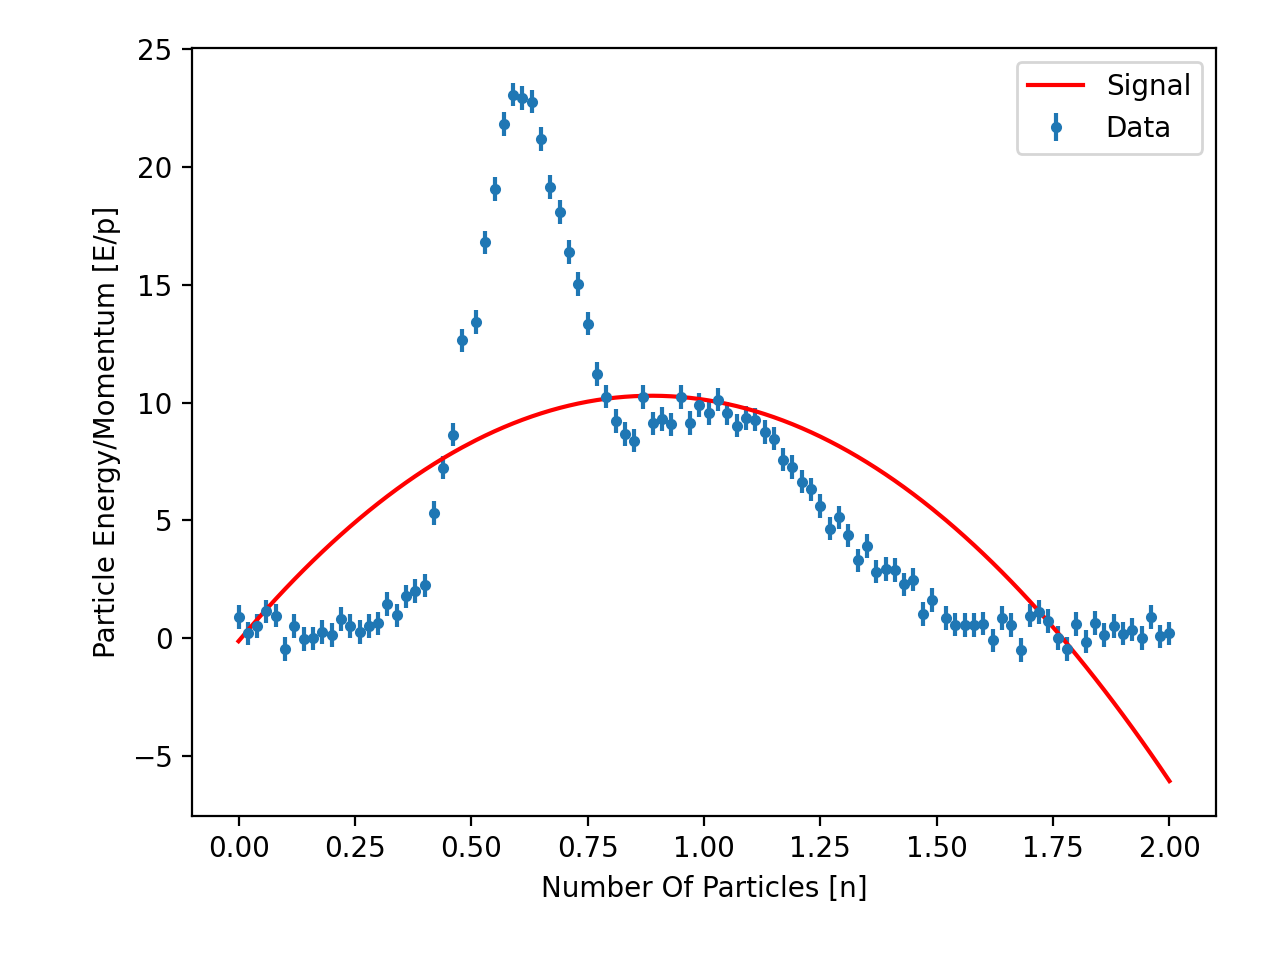

In [81]:
def gaussianBackground(x_2,p1_2,p2_2,p3_2):
    return ((p1_2*np.exp((-(x_2-p2_2)**2)))/(2*p3_2))
def gaussianSignal(x,p1,p2,p3,gaussianBackground):
    return (p1*np.exp((-(x-p2)**2)/(2*p3)))+gaussianBackground

poptS, perrS = curve_fit(gaussianSignal,E_p,n,sigma = n_error, absolute_sigma = True)
print(poptS,perrS)

fig = plt.figure()
axes = fig.add_axes([0.15,0.15,0.8,0.8])
axes.set_xlabel('Number Of Particles [n]')
axes.set_ylabel('Particle Energy/Momentum [E/p]')
axes.errorbar(E_p,n,yerr = n_error,fmt = '.', label = 'Data')
axes.plot(E_p,gaussianSignal(E_p,*poptS),'r-', label = 'Signal')
axes.legend();

**c)** Calculate your $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value for the fit to the data.
Based on those statistics above is this a good fit? Explain.

**d)** On the same graph, plot your data, the total fit to it, and the single Gaussian functions computed using the parameter results from your 2 Gaussian function fit.

Chi^2 = 8418.398748254971 
D.o.F = 95 
Chi^2 Reduced = 88.6147236658418 
P-Value = 0.0
[27.73319788  0.72766341  1.5428466 ] [[1.10912562e+14 4.43013719e+03 6.17039084e+12]
 [4.43013719e+03 7.43780297e-05 2.46461525e+02]
 [6.17039084e+12 2.46461525e+02 3.43276922e+11]]


<IPython.core.display.Javascript object>


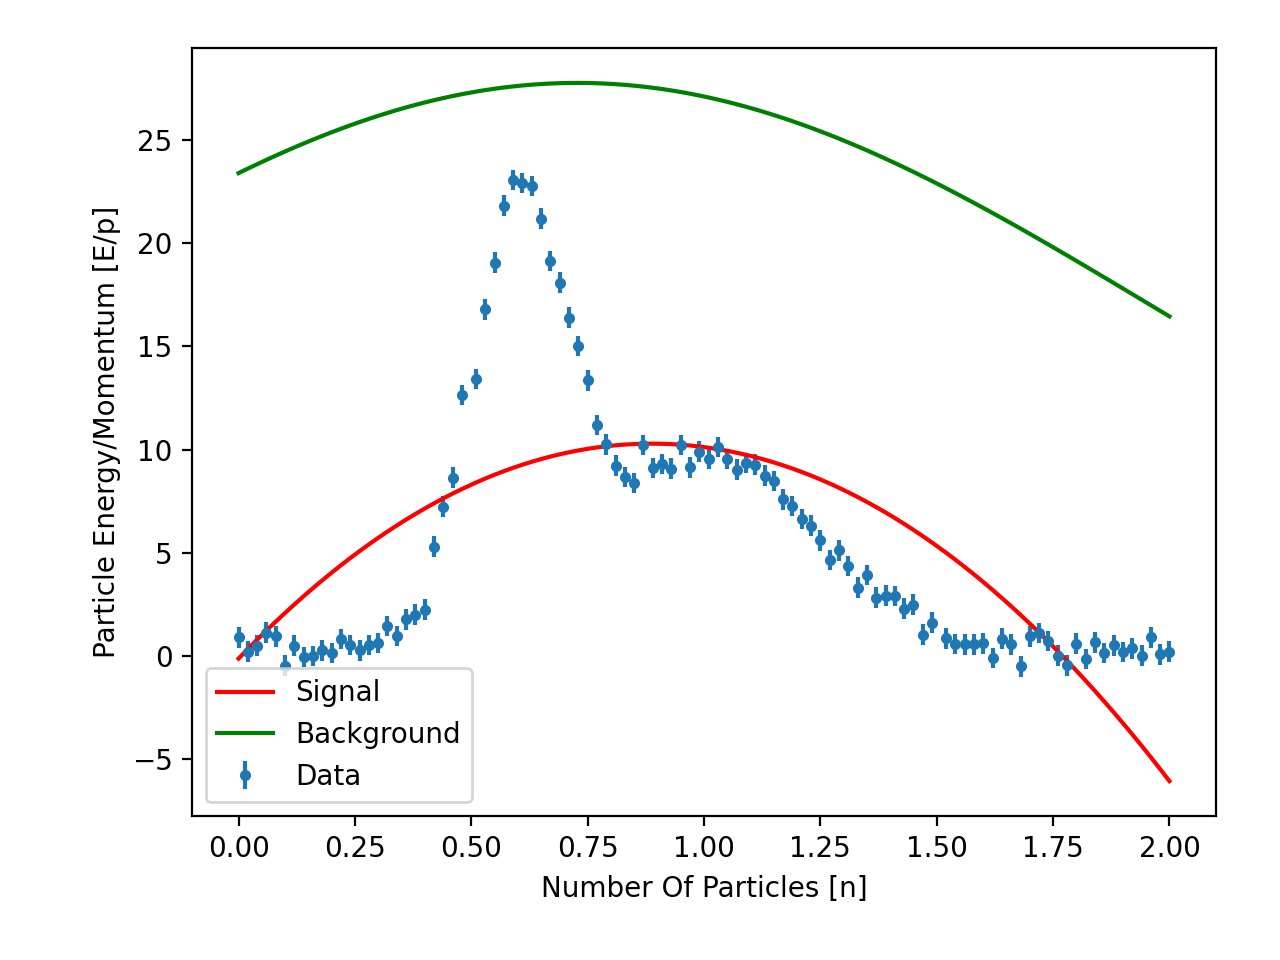

In [82]:
chisq3 = np.sum(((n-gaussianSignal(E_p,*poptS))**2)/(n_error**2))
dof3 = len(n)-len(poptS)-1
chisq3_reduced = chisq3/dof3
chisq3_pvalue = sf.gammaincc(dof3/2.0, chisq3/2.0)
print("Chi^2 =",chisq3,"\nD.o.F =",dof3,"\nChi^2 Reduced =",
      chisq3_reduced,"\nP-Value =",chisq3_pvalue)

poptB, perrB = curve_fit(gaussianBackground,E_p,n,sigma = n_error, absolute_sigma = True)
print(poptB,perrB)

fig = plt.figure()
axes = fig.add_axes([0.15,0.15,0.8,0.8])
axes.set_xlabel('Number Of Particles [n]')
axes.set_ylabel('Particle Energy/Momentum [E/p]')
axes.errorbar(E_p,n,yerr = n_error,fmt = '.', label = 'Data')
axes.plot(E_p,gaussianSignal(E_p,*poptS),'r-', label = 'Signal')
axes.plot(E_p,gaussianSignal(E_p,*poptB,gaussianBackground(.001,.001,.001,.011)),'g-', label = 'Background')
axes.legend();

**e)** We can use the $E/p$ distribution to try to select the maximum number of electron while minimizing the pions that *leak* into our electron signal. We can do this by requireing our selected sample to be larger than some $E/p$ threshold value. Any data that has an $E/p$ value lower then the threshold we throw it out. In a physics analysis this is called a cut. However we need to be careful, if we place a cut at $E/p$ that is too large we will have a really clean electron sample, but throw away a lot of good electrons. On the other hand if we make the $E/p$ cut too low we will keep most of our electrons, but let in a lot of background (pions). So we must compormise between clean data and statistics. To do this lets calculat the total number of electrons we have from $0.0 < E/p < 2$. This can be obtained by integrating (you can use scipy integrators, I used *integrate.quad* when doing this exersise)the electron contribution from our fit. We will call this number e_tot. Do a similar thing for the total pions and call that number pi_tot. 

For 10 equally spaced E/p thresholds between 0.3 and 0.8, calculate the number of electrons that are above each of the thresholds, we can call this array e_sig and can be obtained by integrating from the E/p threshold to the E/p = 2. Do a similar thing for the pion distribution. 



In [116]:
x1=0
x2=2
f1 = lambda x: (poptS[0]*np.exp(-(x-poptS[1])**2/(2*poptS[2])))
e_tot = integrate.quad(f1,x1,x2)
f2 = lambda x: poptB[0]*np.exp(-(x-poptB[1])**2/(2*poptB[2])) 
pi_tot = integrate.quad(f2,x1,x2)

E_p_range = np.linspace(.3,.8,10) 
x2arr = x2*np.ones(10)

for x in np.linspace(.3,.8,10):
    e_sig += integrate.quad(f1,x,x2arr.any())
e_sig_list=list(e_sig[0:20:2])
esig = np.array(e_sig_list)

E_p_range = np.linspace(.3,.8,10) 
x2arr = x2*np.ones(10)

for x in np.linspace(.3,.8,10):
    pi_sig += integrate.quad(f2,x,x2arr.any())
pi_sig_list=list(pi_sig[0:20:2])
pisig = np.array(pi_sig_list)

print("Thresholds:",E_p_range,"\n\nElectrons above corresponding thresholds:",esig
      ,"\n\nPions above corresponding thresholds:",pisig)

Thresholds: [0.3        0.35555556 0.41111111 0.46666667 0.52222222 0.57777778
 0.63333333 0.68888889 0.74444444 0.8       ] 

Electrons above corresponding thresholds: [ -56981.27165283 -199435.31973626 -183606.96072493 -167778.64515756
 -151950.36849882 -136122.1262134  -120293.91376605 -104465.72662153
  -88637.56024462  -72809.41010011] 

Pions above corresponding thresholds: [ 5.48769448 19.12293637 17.66012359 16.17758194 14.67804761 13.16435645
 11.63942793 10.10624827  8.5678529   7.02730847]


**f)** Plot the ratios e_sig/e_tot and pi_sig/pi_tot as a function of E/p threshold on the same graph. 

<IPython.core.display.Javascript object>


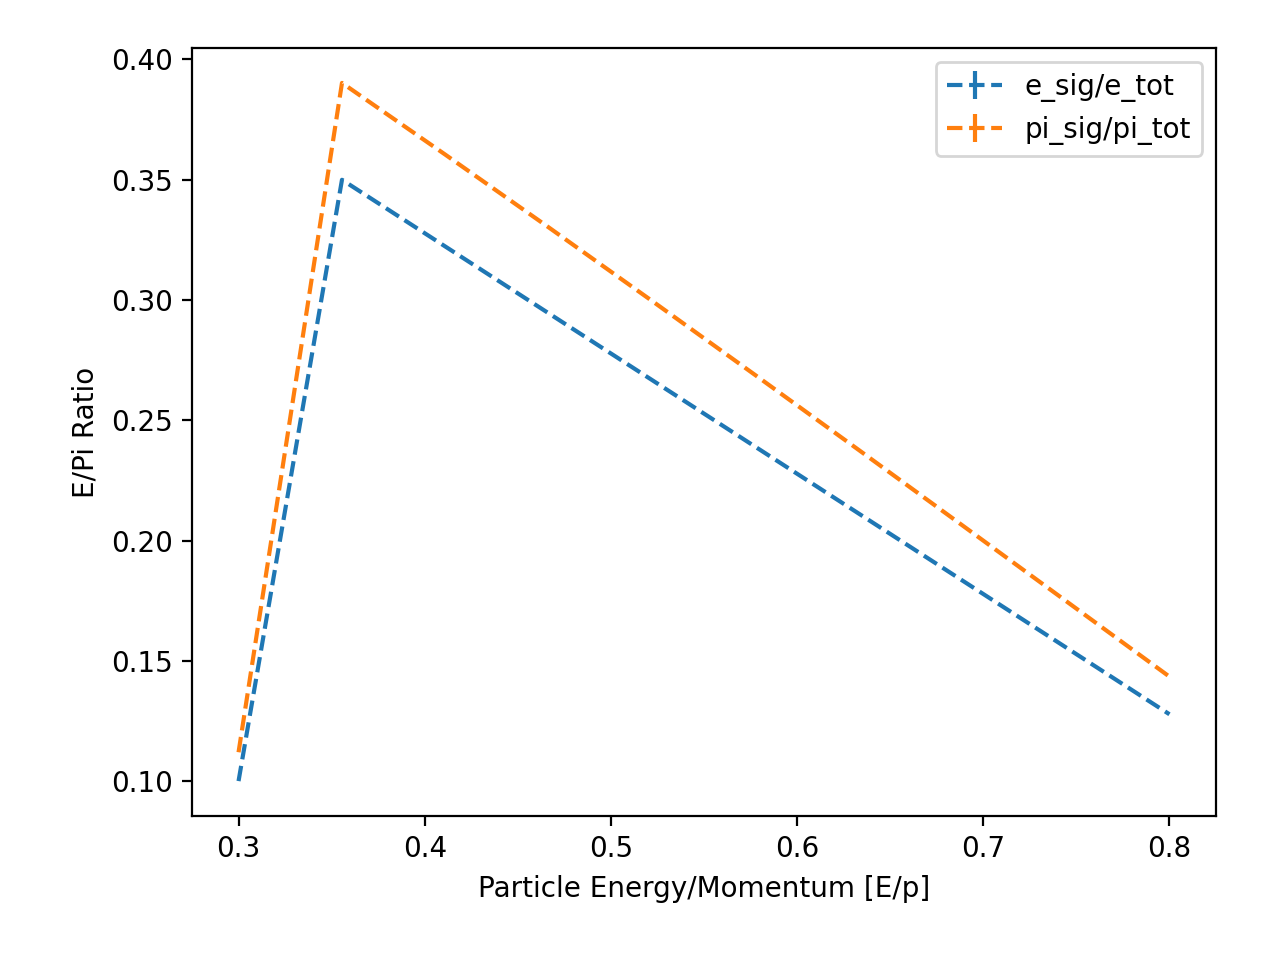

In [117]:
e_tot_arr = np.ones(10)*int(e_tot[0])
pi_tot_arr = np.ones(10)*int(pi_tot[0])

e_tot_arr_err = np.ones(10)*int(e_tot[1])
pi_tot_arr_err = np.ones(10)*int(pi_tot[1])

e_ratio = esig/e_tot_arr
pi_ratio = pisig/pi_tot_arr

fig = plt.figure()
axes = fig.add_axes([0.15,0.15,0.8,0.8])
axes.set_xlabel('Particle Energy/Momentum [E/p]')
axes.set_ylabel('E/Pi Ratio')
axes.errorbar(E_p_range, e_ratio, yerr = e_tot_arr_err, fmt = '--', label = 'e_sig/e_tot')
axes.errorbar(E_p_range,pi_ratio, yerr = pi_tot_arr_err,fmt = '--', label = 'pi_sig/pi_tot')
axes.legend();

**g)** When the e_sig/etot ratio is 90%, how what percentage of the pion distribution is contaminating our electron sample?

In [134]:
pi_contaminat=100*(pi_ratio[9]-e_ratio[9])/e_ratio[9]
print(pi_contaminat,'%')

12.23902246227123 %
